In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os 
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
mnist=tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [7]:
model=tf.keras.models.Sequential()


In [15]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28),)) #input layer 0
model.add(tf.keras.layers.Dense(128,activation="sigmoid"))  #hidden layer ly1
model.add(tf.keras.layers.Dense(128,activation="sigmoid")) #hidden layer ly2
model.add(tf.keras.layers.Dense(128,activation="sigmoid"))  #hidden layer ly3
model.add(tf.keras.layers.Dense(10,activation="softmax"))  #output layer ly4


In [16]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [17]:
model.fit(x_train,y_train,epochs=7)

Epoch 1/7
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5026 - accuracy: 0.8643
Epoch 2/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0791 - accuracy: 0.9845
Epoch 3/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0673 - accuracy: 0.9863
Epoch 4/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0539 - accuracy: 0.9887
Epoch 5/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0473 - accuracy: 0.9892
Epoch 6/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0479 - accuracy: 0.9896
Epoch 7/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0407 - accuracy: 0.9912


In [18]:
model.save("handwritten.model")

In [19]:
model=tf.keras.models.load_model("/content/drive/MyDrive/handwritten.model")

In [20]:
loss,accuracy=model.evaluate(x_test,y_test)
print(loss,accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0911 - accuracy: 0.9740
0.09107980877161026 0.9739999771118164


1/1 [==============================] - 0s 57ms/step
this digit is probably a 0


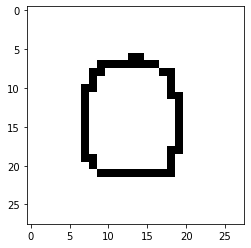

1/1 [==============================] - 0s 18ms/step
this digit is probably a 2


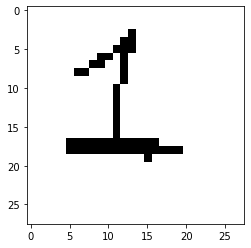

1/1 [==============================] - 0s 20ms/step
this digit is probably a 2


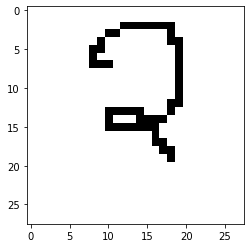

1/1 [==============================] - 0s 22ms/step
this digit is probably a 3


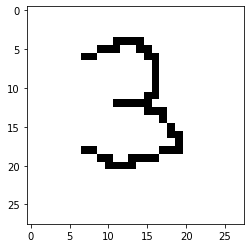

1/1 [==============================] - 0s 21ms/step
this digit is probably a 6


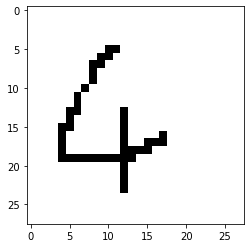

1/1 [==============================] - 0s 22ms/step
this digit is probably a 3


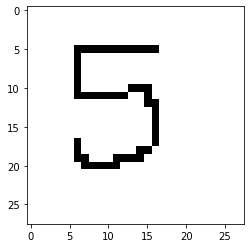

1/1 [==============================] - 0s 22ms/step
this digit is probably a 5


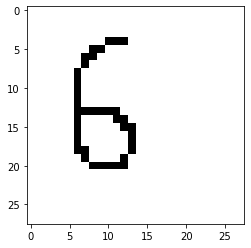

1/1 [==============================] - 0s 19ms/step
this digit is probably a 8


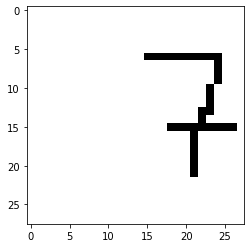

1/1 [==============================] - 0s 21ms/step
this digit is probably a 3


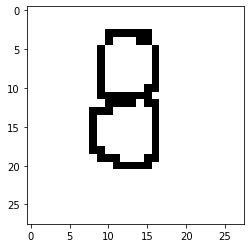

1/1 [==============================] - 0s 19ms/step
this digit is probably a 1


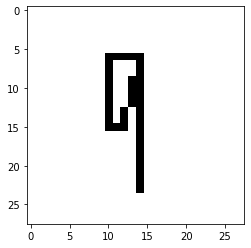

In [21]:
image_number=0
while os.path.isfile(f"/content/drive/MyDrive/handwritten.model/digitdir/digit{image_number}.png"):
  try:
    img=cv2.imread(f"/content/drive/MyDrive/handwritten.model/digitdir/digit{image_number}.png")[:,:,0]
    img=np.invert(np.array([img]))
    predict=model.predict(img)  #here the whole vector is returned like all the probabilty of all the digit is returned in form of np.array so prediction is an np.array
    print(f"this digit is probably a {np.argmax(predict)}")
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
  
  except:
    print("error")
  
  finally:
    image_number+=1
